In [1]:
import pytz
from data_tools.query import DBClient
from data_tools.collections import TimeSeries
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import pytz

In [2]:
client = DBClient()

start = datetime(2025, 5, 31, 20, tzinfo=pytz.UTC)
stop = datetime(2025, 5, 31, 23, tzinfo=pytz.UTC)

lat = client.query_time_series(start, stop, "GPSLatitude")
lon = client.query_time_series(start, stop, "GPSLongitude")

Creating client with API Token: s4Z9_S6_O09kDzYn1KZcs7LVoCA2cVK9_ObY44vR4xMh-wYLSWBkypS0S0ZHQgBvEV2A5LgvQ1IKr8byHes2LA==
Creating client with Org: 8a0b66d77a331e96


In [3]:
zero_mask = (np.asarray(lat) > 130) | (np.asarray(lat) < 120) \
            | (np.asarray(lon) > 55) | (np.asarray(lon) < 40)

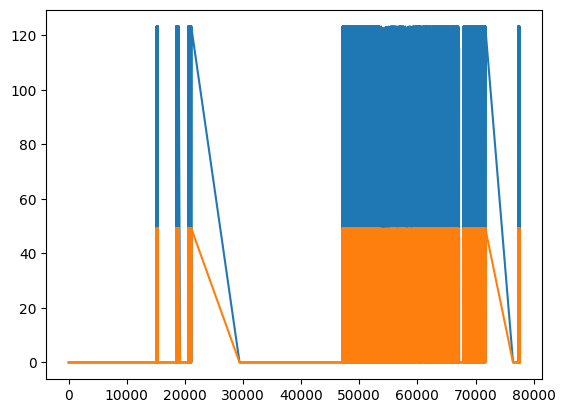

In [4]:
plt.plot(lat)
plt.plot(lon)
plt.show()

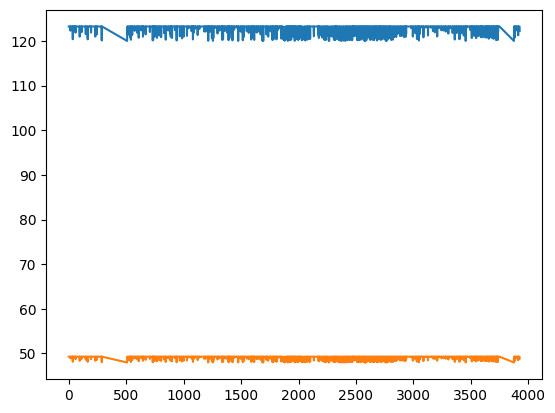

In [5]:
plt.plot(lat[~zero_mask])
plt.plot(lon[~zero_mask])
plt.show()

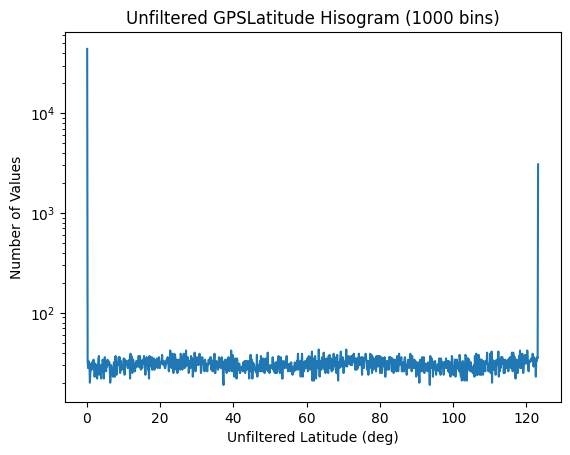

In [6]:
lat_hist, edges = np.histogram(lat, bins=1000)

def get_midpoints(edges):
    return (np.asarray(edges[:-1]) + np.asarray(edges[1:]))/2
    
plt.plot(get_midpoints(edges), lat_hist)
plt.yscale('log')
plt.title(f'Unfiltered GPSLatitude Hisogram ({len(edges) - 1} bins)')
plt.xlabel('Unfiltered Latitude (deg)')
plt.ylabel('Number of Values')
plt.show()

In [7]:
starbucks_parking_lot_lat = -123.246

earth_circumference_m = 40_000_000  # correct within <1%

# NOTE: latitude is unsigned?
ten_km_mask = np.abs(-lat - starbucks_parking_lot_lat) < 10000 / (earth_circumference_m / 360)
km_mask = np.abs(-lat - starbucks_parking_lot_lat) < 1000 / (earth_circumference_m / 360)
hundred_m_mask = np.abs(-lat - starbucks_parking_lot_lat) < 100 / (earth_circumference_m / 360)

print(f"Total values: {len(lat)}")
print(f"Nonzero values: {len(lat[lat != 0])}")
print(f"Within 1km: {np.count_nonzero(km_mask)} ({np.count_nonzero(km_mask)/len(lat[lat != 0]):.3f}% of nonzero)")
print(f"Within 100m: {np.count_nonzero(hundred_m_mask)} ({np.count_nonzero(hundred_m_mask)/len(lat[lat != 0]):.3f}% of nonzero)")

Total values: 77579
Nonzero values: 33626
Within 1km: 3046 (0.091% of nonzero)
Within 100m: 2654 (0.079% of nonzero)


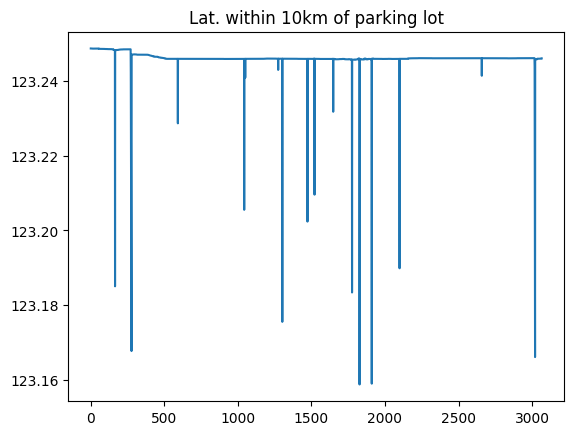

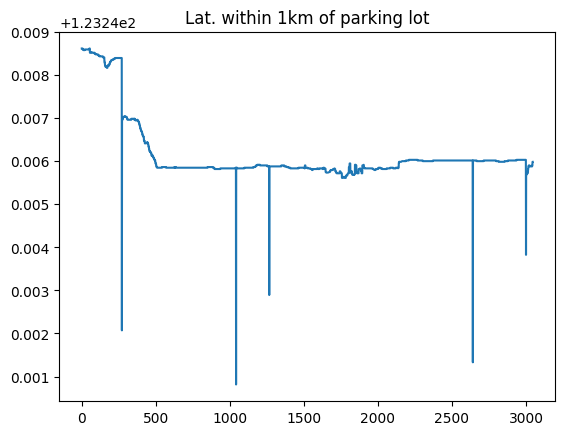

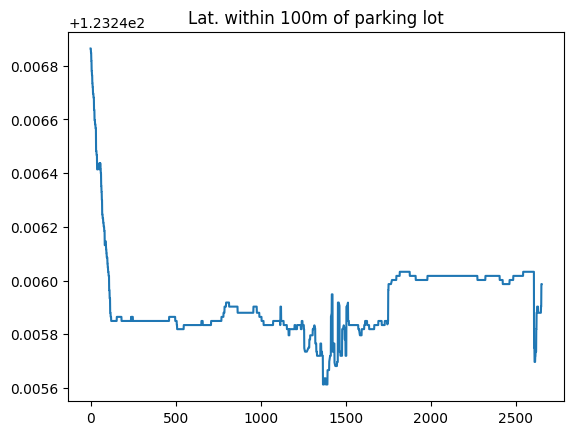

In [8]:
plt.plot(lat[ten_km_mask])
plt.title('Lat. within 10km of parking lot')
plt.show()

plt.plot(lat[km_mask])
plt.title('Lat. within 1km of parking lot')
plt.show()

plt.plot(lat[hundred_m_mask])
plt.title('Lat. within 100m of parking lot')
plt.show()

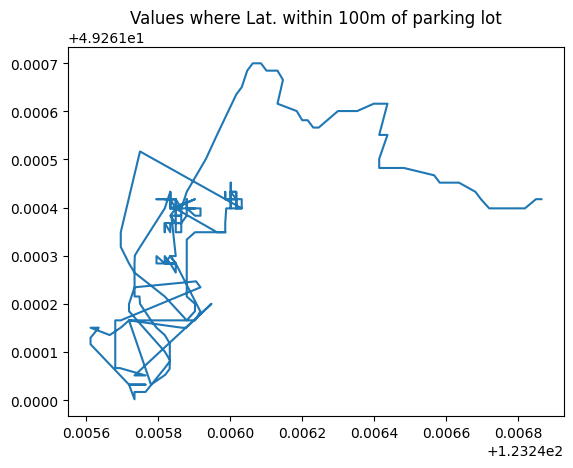

In [9]:
plt.plot(lat[hundred_m_mask], lon[hundred_m_mask])
plt.title('Values where Lat. within 100m of parking lot')
plt.show()

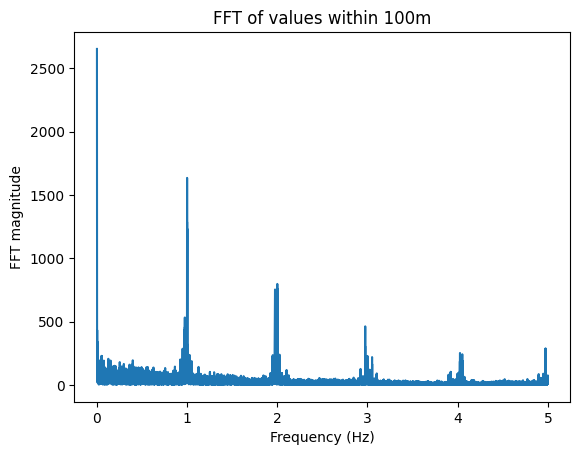

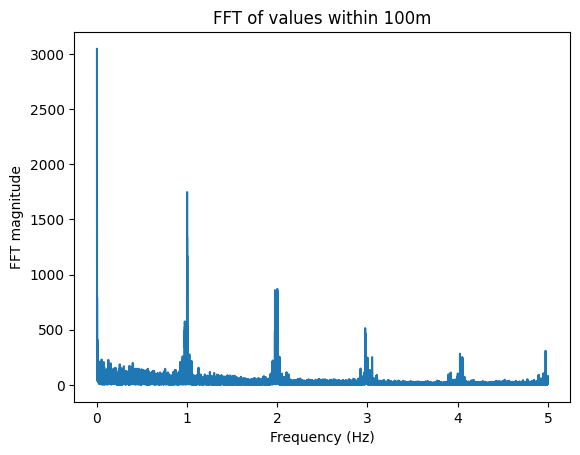

In [10]:
fft_100m = np.abs(np.fft.rfft(hundred_m_mask))
frequencies_100m = np.fft.rfftfreq(len(hundred_m_mask), lat.granularity)
plt.plot(frequencies_100m, fft_100m)
plt.xlabel("Frequency (Hz)")
plt.ylabel("FFT magnitude")
plt.title("FFT of values within 100m")
plt.show()

fft_100m = np.abs(np.fft.rfft(km_mask))
frequencies_100m = np.fft.rfftfreq(len(km_mask), lat.granularity)
plt.plot(frequencies_100m, fft_100m)
plt.xlabel("Frequency (Hz)")
plt.ylabel("FFT magnitude")
plt.title("FFT of values within 100m")
plt.show()

[]

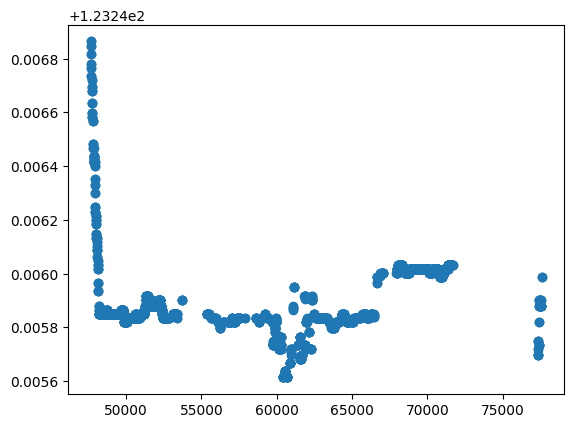

In [11]:
plt.scatter(np.arange(len(lat))[hundred_m_mask], lat[hundred_m_mask])
plt.plot()

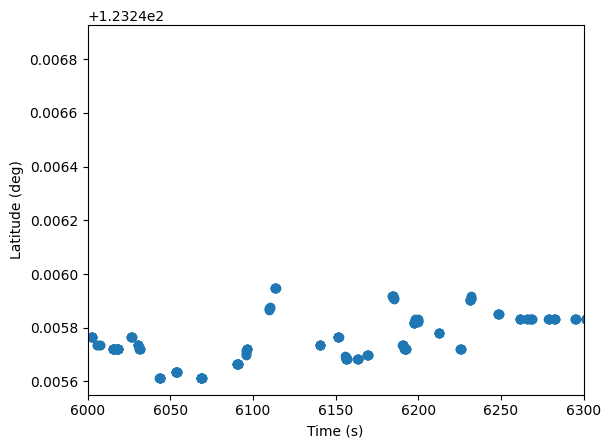

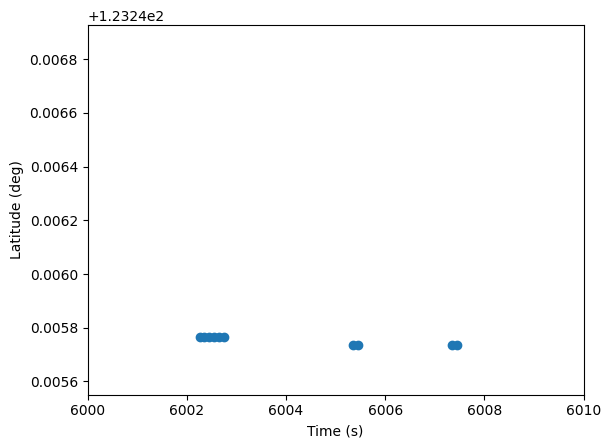

In [27]:
plt.scatter(np.arange(len(lat))[hundred_m_mask]*lat.granularity, lat[hundred_m_mask])
plt.xlim(6000, 6300)
plt.xlabel("Time (s)")
plt.ylabel("Latitude (deg)")
plt.plot()
plt.show()

plt.scatter(np.arange(len(lat))[hundred_m_mask]*lat.granularity, lat[hundred_m_mask])
plt.xlim(6000, 6010)
plt.xlabel("Time (s)")
plt.ylabel("Latitude (deg)")
plt.plot()
plt.show()